# CH4. 신경망 학습

## 4.2 손실 함수

### 4.2.1 오차제곱합

In [1]:
import numpy as np
def sum_squares_error(y, t):
  return 0.5 * np.sum((y-t)**2)

In [2]:
t = [0,0,1,0,0,0,0,0,0,0]

#ex1. '2'일 확률이 가장 높다고 추정함(0.6)
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y1), np.array(t)))

#ex2. '7'일 확률이 가장 높다고 추정함(0.6)
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y2), np.array(t)))

0.09750000000000003
0.5975


### 4.2.2 교차 엔트로피 오차

In [3]:
def cross_entropy_error(y,t):
  delta = 1e-7 #y값이 0일때, log가 -inf가 되는 것을 방지
  return -np.sum(t * np.log(y+delta))

In [4]:
t = [0,0,1,0,0,0,0,0,0,0]

#ex1. '2'일 확률이 가장 높다고 추정함(0.6)
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y1), np.array(t)))

#ex2. '7'일 확률이 가장 높다고 추정함(0.6)
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y2), np.array(t)))

0.510825457099338
2.302584092994546


### 4.2.3 미니배치 학습

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import sys, os
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
from dataset.mnist import load_mnist

In [7]:
(x_train, t_train), (x_tets, t_test) = \
  load_mnist(normalize = True, one_hot_label = True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [8]:
# 훈련 데이터에서 사이즈가 10인 배치를 추출
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
#무작위로 선택한 값을 추출할 인덱스로 사용

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

###4.2.4 배치 데이터를 지원하는 교차 엔트로피 오차 구현하기

In [9]:
def cross_entropy_error(y, t):
  if y.ndim == 1: #데이터가 하나인 경우
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum()

<br>

## 4.3 수치 미분

### 4.3.1 미분

In [10]:
#중심 차분(중앙 차분)
def numerical_diff(f, x):
  h = 1e-4
  return(f(x+h)-f(x-h))/ (2*h)

### 4.3.2 수치 미분의 예

In [11]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

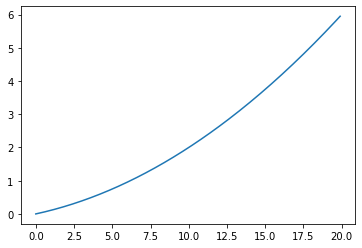

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.plot(x,y)
plt.show()

In [13]:
numerical_diff(function_1, 5)

0.1999999999990898

In [14]:
numerical_diff(function_1, 10)

0.2999999999986347

### 4.3.3 편미분

In [15]:
def function_2(x):
  return np.sum(x**2)

In [16]:
#x0=3, x=4일 때, x0에 대한 편미분
def function_tmp1(x0):
  return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [17]:
#x0=3, x=4일 때, x1에 대한 편미분
def function_tmp2(x1):
  return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

<Br>

## 4.4 기울기

기울기(gradient) : 모든 변수의 편미분을 벡터로 정리한 것

In [18]:
import numpy as np

def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp_val = x[idx]

    #f(x+h) 계산
    x[idx] = tmp_val + h
    fxh1 = f(x)

    #f(x-h) 계산
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val #값 복원

  return grad

In [19]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [20]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [21]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

* 기울기가 가리키는 쪽으 각 장소에서 출력 값을 가장 크게 줄이는 방향

### 4.4.1 경사법(경사 하강법)

In [22]:
#경사 하강법의 구현
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
  x = init_x #초깃값

  for i in range(step_num): #step_num : 경사 하강법ㅇ에 따른 반복 횟수
    grad = numerical_gradient(f,x)
    x -= lr*grad #lr = learning rate, 학습률

  return x

Q. 경사하강법으로 f(x0, x1) = x0^2 + x1^2 의 최솟값을 구하라.

In [23]:
def function_2(x):
  return x[0]**2 + x[1]**2

init_x = np.array([-3.0, -4.0])
gradient_descent(function_2, init_x, lr = 0.1, step_num = 100)

array([-6.11110793e-10, -8.14814391e-10])

In [24]:
#학습률이 너무 큰 경우 ex. lr = 10.0
init_x = np.array([-3.0, -4.0])
gradient_descent(function_2, init_x, lr = 10.0, step_num = 100)

array([-2.58983747e+13,  1.29524862e+12])

In [25]:
#학습률이 너무 작은 경우 ex. lr = 1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr = 1e-10, step_num = 100)

array([-2.99999994,  3.99999992])

- 학습률이 큰 경우 큰 값으로 발산
- 학습률이 작은 경우 초깃값에서 거의 갱신되지 않음

### 4.4.2 신경망에서의 기울기

여기서의 기울기는 가중치 매개변수에 대한 손실함수의 기울기를 의미

In [26]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2,3) #정규분포로 초기화

  def predict(self, x):
    return np.dot(x, self.W)
  
  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)
    return loss

In [27]:
net = simpleNet()
print(net.W)

[[ 1.01867394  1.43003125 -1.20774157]
 [ 1.97640796 -0.59539994  0.70850347]]


In [28]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 2.38997153  0.32215881 -0.08699182]


In [29]:
np.argmax(p)

0

In [30]:
t = np.array([0, 0, 1]) #정답 레이블
net.loss(x, t)

2.6679623609708774

In [31]:
# 기울기 계산
def f(W): #W를 인수로 받아 손실 함수를 계산하는 새로운 함수 f를 정의
  return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.49567862  0.06268455 -0.55836317]
 [ 0.74351792  0.09402683 -0.83754475]]


In [32]:
#함수 구현 방법 - lambda 이용
f = lambda w: net.loss(x,t)
dW = numerical_gradient(f, net.W)

<br>

## 4.5 학습 알고리즘 구현하기

### 4.5.1 2층 신경망 클래스 구현하기

In [59]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [67]:
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, 
               weight_init_std = 0.01):
  
    #가중치 초기화
    self.params = {}
    self.params['W1'] = weight_init_std*\
                        np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std*\
                        np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y
  
  def loss(self, x, t): #x(입력 데이터), t(정답답 레이블)
    y = self.predict(x)
    y = np.argmax(y, axis = 1)
    t = np.argmax(t, axis = 1)

    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy
  
  def numerical_gradient(self, x, t):
    loss_W = lambda W : self.loss(x, t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads

In [66]:
net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size = 10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(784, 10)
(10,)


### 4.5.2 미니배치 학습 구현하기

In [ ]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
  load_mnist(normalize = True, one_hot_label = True)

train_loss_list = []

#하이퍼파라미터
iters_num = 10000 #반반복 횟수
train_size = x_train.shape[0]
batch_size = 100 #미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

for i in range(iters_num):
  #미니배치 획득
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  #기울기 계산
  grad = network.numerical_gradient(x_batch, t_batch)
  
  #매개변수 갱신
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  #학습 경과 기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

### 4.5.3 시험 데이터로 평가하기

In [ ]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
  load_mnist(normalize = True, one_hot_label = True)

train_loss_list = []
train_acc_list = []
test_acc_list = []


#1에폭 당 반복 수
iter_per_epoch = max(train_size/batch_size, 1)


for i in range(iters_num):
  #미니배치 획득
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  #기울기 계산
  grad = network.numerical_gradient(x_batch, t_batch)
  
  #매개변수 갱신
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  #학습 경과 기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

  #1에폭당 정확도 계산
  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train acc, test acc : " + str(train_acc) + ', ' + str(test_acc))